# Descriptive Analytics and Visualization
## Analyze the passengers boarding the Titanic Ship
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15th April 1912. Let us use the passenger of that ill-fated ship to look into some summary trends.

<img src="titanic2.png",width=980,height=200>

Import pandas, pylab and numpy packages

In [1]:
import pandas as pd
import pylab as plt
import numpy as np

Import the dataset of the passengers in titanic. Look at the header

In [2]:
df = pd.read_csv('titanic_data.csv', sep='\t', header = 'infer')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
total_passengers = df['PassengerId'].count()
print ("Total rows in the dataset are", total_passengers+1)

Total rows in the dataset are 157


Cheking how many null values are there for a particular column

In [5]:
df['Survived'].isnull().value_counts()

False    156
Name: Survived, dtype: int64

### Passengers survived in each class

In [6]:
survivors = df.groupby('Pclass')['Survived'].agg(sum)
survivors.head()

Pclass
1    12
2    14
3    28
Name: Survived, dtype: int64

### Total Passengers in each class

In [7]:
total_passengers = df.groupby('Pclass')['PassengerId'].count()

In [8]:
survivor_percentage = survivors / total_passengers

#### Plotting the Total number of survivors

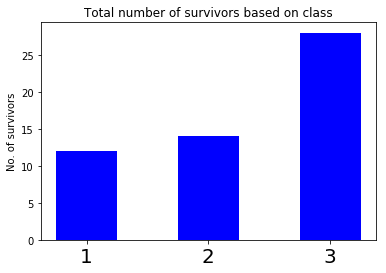

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(),
survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

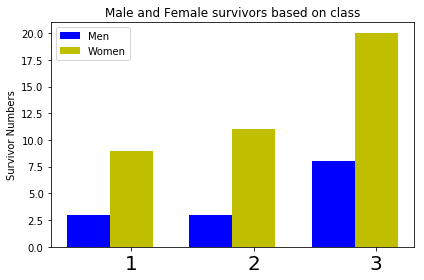

In [10]:
# Male Passengers survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)
#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / male_total_passengers
# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)
#Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors 
female_total_passengers
#Plotting the total passengers who survived based on Gender
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect1 = ax.bar(index, male_survivors, bar_width, color='blue',
label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width,
color='y', label='Women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

### Percentage of Total Passengers in each age group.

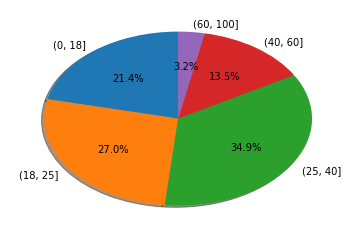

In [11]:
#Checking for null values
df['Age'].isnull().value_counts()
#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]
#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)
#Removing the null rows
d_temp = df[np.isfinite(df['Age'])] # removing all na instances
#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)
#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')
labels = (total_passengers.index)

plt.pie(total_passengers,autopct='%1.1f%%',labels=labels, shadow=True, startangle=90)
plt.show()

### Percentage of Survivors in each age group

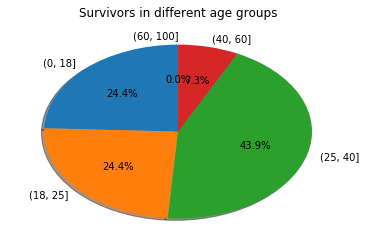

In [12]:
 #Plotting the pie chart of percentage passengers in each bin
labels=survivors.index
plt.pie(survivors, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Survivors in different age groups')
plt.show()

# Show Casing Python's Visualization Capabalites

### Simple Line plot

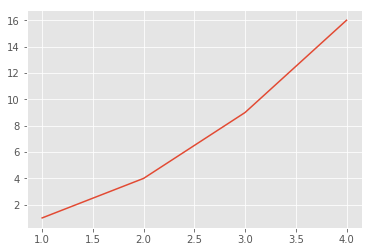

In [13]:
plt.style.use('ggplot')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

### Box plots
A box plot is a very good plot to understand the spread, median, and outliers of data:
<img src="boxplot.png",width=200,height=200>


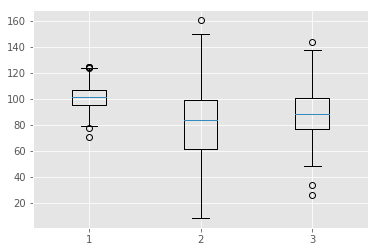

In [14]:
## Creating some data
np.random.seed(10)
box_data_1 = np.random.normal(100, 10, 200)
box_data_2 = np.random.normal(80, 30, 200)
box_data_3 = np.random.normal(90, 20, 200)
## Combining the different data in a list
data_to_plot = [box_data_1, box_data_2, box_data_3]
# Create the boxplot
bp = plt.boxplot(data_to_plot)
plt.show()

### Heatmaps
A heatmap is a graphical representation where individual values of a matrix are
represented as colors. A heatmap is very useful in visualizing the concentration of
values between two dimensions of a matrix. This helps in finding patterns and gives
a perspective of depth.

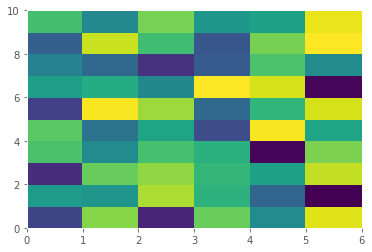

In [15]:
# Generate Data
data = np.random.rand(10,6)
rows = list('ZYXWVUTSRQ') #Ylabel
columns = list('ABCDEF') #Xlabel
#Basic Heat Map plot
plt.pcolor(data)
plt.show()

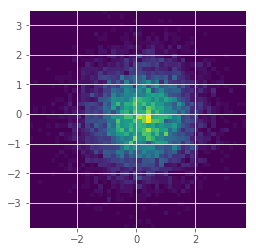

In [16]:
# Generate some test data
x = np.random.randn(8873)
y = np.random.randn(8873)
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap, extent=extent)
plt.show()

### Scatter plots Matrix
We can create a scatter plots matrix for each axis. These kinds of
plots help us see the distribution of the values of each axis.

/Users/iahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


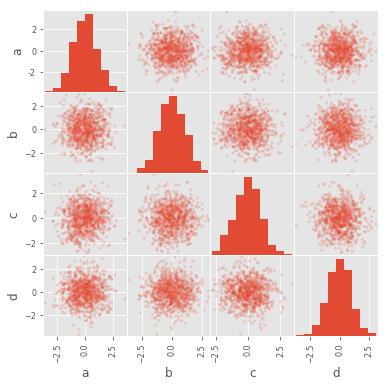

In [17]:
df = pd.DataFrame(np.random.randn(1000, 4),
columns=['a', 'b', 'c', 'd'])
spm = pd.tools.plotting.scatter_matrix(df, alpha=0.2,
figsize=(6, 6), diagonal='hist')
plt.show()


In [18]:
df = pd.DataFrame(np.random.rand(10, 4),
columns=['p', 'q', 'r', 's'])
df.head()

,p,q,r,s
0,0.539817,0.436361,0.677765,0.511739
1,0.753820,0.858764,0.958759,0.224595
2,0.441647,0.962354,0.872382,0.762039
3,0.002580,0.984256,0.201328,0.750692
4,0.536262,0.601562,0.573708,0.160954


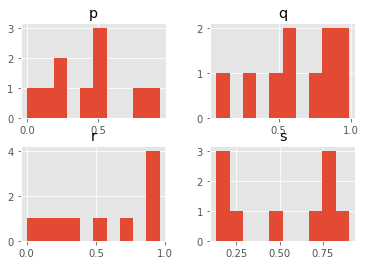

In [19]:
df.hist()
plt.show()

## Area plots
An area plot is useful for comparing the values of different factors across a range. The
area plot can be stacked in nature, where the areas of the different factors are stacked

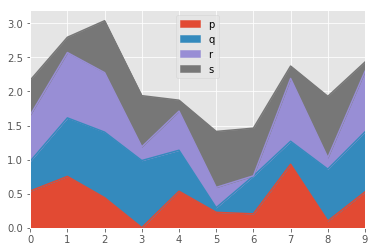

In [20]:
df.plot(kind='area');
plt.show()

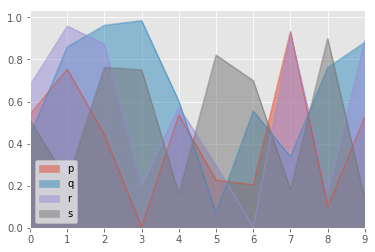

In [21]:
df.plot(kind='area', stacked=False);
plt.show()

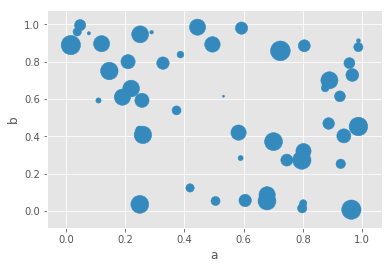

In [22]:
plt.style.use('ggplot')
df = pd.DataFrame(np.random.rand(50, 3), columns=['a', 'b', 'c'])
df.plot(kind='scatter', x='a', y='b', s=df['c']*400);
plt.show()

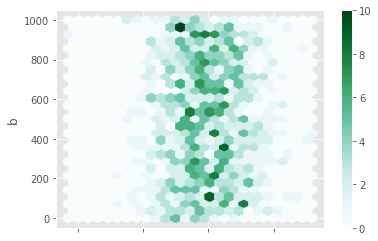

In [23]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot(kind='hexbin', x='a', y='b', gridsize=25)
plt.show()

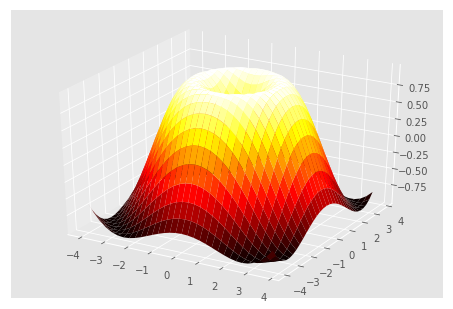

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
plt.show()

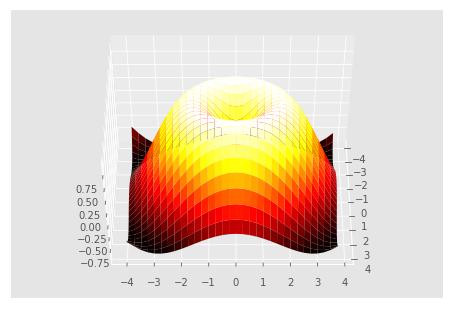

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=50., azim=0)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
plt.show()